In [1]:
#!/usr/bin/python
# -*- coding:Utf-8 -*-

# Audrey D.
# February 2019

import matplotlib.pyplot as plt
import numpy as np

import xarray as xr

In [2]:
# dispersion relations dimensionalisée

N=2e-3
H=3000
B=2.3e-11

modes2 = xr.open_dataset('lambda.nc')
# modes3 = modes2.modes
# modes = modes2.modes.values

def compute_constant(n):
    
    """
    Compute the constant of separation c and
    the dimension O and K of omega and k such 
    that omega = f(k) -> omega*/O = f(k*/K)
    """
    c = 1./(modes2.lamba.values[n])
    print('c = ',c)
    
    L = np.sqrt(c/B)
    T = 1./np.sqrt(c*B)

    O=1./(2*np.pi*T)
    K=1./(2*np.pi*L)

    return c,O,K



def rossby_relation(k,m,n,**kwargs):

    """
    approximated relation dispersion for Rossby waves
    """

    options={
        'dim':False,
        }

    options.update(kwargs)

    dim=options['dim']

    if dim==False:
        omega = -1.*(k/(k**2+2*m+1))
    if dim==True:
        c,O,K = compute_constant(n)
        omega = -1.*O*((K**-1)*k/((K**-2)*(k**2)+2*m+1))

    return omega


def gravity_relation(k,m,n,**kwargs):

    """
    Approximated relation dispersion for Inerta-Gravity waves
    """
    
    options={
        'dim':False,
        }

    options.update(kwargs)

    dim=options['dim']

    if dim==False:
        omega=np.sqrt(k**2+2*m+1)
    if dim==True:
        c,O,K = compute_constant(n)
        omega= O*np.sqrt((K**-2)*(k**2)+2*m+1)

    return omega


def yanai_relation(k,n,**kwargs):

    """
    Relation dispersion for Yanai waves
    """
    
    options={
        'dim':False,
        }

    options.update(kwargs)

    dim=options['dim']


    if dim==False:
        omega=(1/2.)*(k+np.sqrt(k**2+4))
    if dim==True:
        c,O,K = compute_constant(n)
        omega= O*(1./2.)*((K**(-1))*k+np.sqrt((K**(-2))*(k**2)+4))

    return omega


def kelvin_relation(k,n,**kwargs):

    """
    Relation dispersion for Kelvin waves
    """
    
    options={
        'dim':False,
        }

    options.update(kwargs)

    dim=options['dim']

   
    if dim==False:
        omega=k
    if dim==True:
        c,O,K = compute_constant(n)
        omega= O*(K**-1)*k

    return omega


In [11]:
def plot_dimensional_dispR(M_modes,N_modes):


    """
    Plot dispersion relation as a function of vertical modes
    n=[1,..,N_modes]
    """
    
    oneday=86400
    onedeg=111000
 
    D=True

    k=np.arange(-5e-6,5e-6,5e-8)

    f,ax1 = plt.subplots(figsize=(12,12)) 
    
    for n in range(0,N_modes):
#         print('coucou')
        omega_Y=yanai_relation(k,n,dim=D)
        omega_K=kelvin_relation(k,n,dim=D)

        if n==1:
            lb=1
        else:
            lb=1


        for m in range(1,M_modes):
            
            omega_R=rossby_relation(k,m,n ,dim=D)
            omega_G=gravity_relation(k,m,n,dim=D)

            if m==1:
                lp='-'
            else:
                lp='--'
            
            ax1.plot(k*onedeg,omega_R*oneday,color='b',lw=lb,ls=lp)
            ax1.plot(k*onedeg,omega_G*oneday,color='r',lw=lb,ls=lp)

        ax1.plot(k*onedeg,omega_K*oneday, color='g',lw=lb)
        ax1.plot(k*onedeg,omega_Y*oneday, color='k',lw=lb)
       
    ax1.set_xlim(-0.5,0.1)
    ax1.set_ylim(0.,0.1)
    ax1.grid('on')

    ax1.tick_params(labelsize=15)

    ax1.set_xlabel("k "+r"[$degree^{-1}$]",size=15)
    ax1.set_ylabel(r"$\omega$ "+r"[$days^{-1}$]",size=15)   

    def xtick_function(r): return np.round(1./r)
    def ytick_function(r): return np.round(1./r)

    ax2 = ax1.twinx() 
    ax2.tick_params(axis='y',labelsize=15)
    ax2.set_ylabel("period [days]",size=15)   
    
    ylim2 = ax1.get_ylim()
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_yticks(ax1.get_yticks()[:-1])
    ax2.set_yticklabels(ytick_function(ax1.get_yticks()[:-1]))
    
    ax3 = ax1.twiny()  
    ax3.tick_params(axis='x',labelsize=15)
    ax3.set_xlabel("Wavelength"+" [degrees longitude]",size=15)   

    ylim3 = ax1.get_xlim()
    ax3.set_xlim(ax1.get_xlim())
    ax3.set_xticks(ax1.get_xticks()[:-1])
    ax3.set_xticklabels(xtick_function(ax1.get_xticks()[:-1]))



    # points corresponding to experiments

    ax1.scatter(-1./(975*1000/onedeg),1./(34),s=150,color='y',zorder=20)
    plt.text(-1./(1025*1000/onedeg),1./(33),"$A_{k_1}$",fontsize=16)
    
    ax1.scatter(-1./(780*1000/onedeg),1./(34),s=150,color='pink',zorder=20)
    plt.text(-1./(830*1000/onedeg),1./(32),"$A_{T_1}$",fontsize=16,weight = 'bold')
    
    ax1.scatter(-1./(1080*1000/onedeg),1./(44),s=150,color='green',zorder=20)
    plt.text(-1./(1130*1000/onedeg),1./(43),"$A_{k_2}$",fontsize=16,weight = 'bold')
    
    ax1.scatter(-1./(945*1000/onedeg),1./(34),s=150,color='darkgreen',zorder=20)
    plt.text(-1./(995*1000/onedeg),1./(33),"$A_{T_2}$",fontsize=16,weight = 'bold')
    
    ax1.scatter(-1./(820*1000/onedeg),1./(42),s=150,color='purple',zorder=20)
    plt.text(-1./(870*1000/onedeg),1./(41),"$A_{3}$",fontsize=16,weight = 'bold')
    
    ax1.scatter(-1./(1400*1000/onedeg),1./(32),s=150,color='darkviolet',zorder=20)
    plt.text(-1./(1400*1000/onedeg),1./(31),"$A_{4}$",fontsize=16,weight = 'bold')

    f.tight_layout()
    
    plt.show(block=True)

In [12]:
1/(modes2.lamba.values)
# modes2.lamba.values

array([3.19687247, 2.49000393, 1.16511315, 1.06703937, 0.7065781 ,
       0.67900269, 0.50565452, 0.49793725, 0.39341374, 0.39310986,
       0.32474375, 0.32188869, 0.27663402, 0.27235736, 0.24093958,
       0.23603445, 0.21340379, 0.2082598 , 0.19151634, 0.1863338 ,
       0.1737018 , 0.16858499, 0.15890506, 0.15392716, 0.14656852,
       0.14157616, 0.13566185, 0.13128652, 0.126842  , 0.12257192,
       0.11852248, 0.11174916, 0.10725759, 0.09836491, 0.09773595,
       0.08727268, 0.07682761])

c =  3.1968724711489727
c =  3.1968724711489727
c =  3.1968724711489727
c =  3.1968724711489727
c =  3.1968724711489727
c =  3.1968724711489727
c =  3.1968724711489727
c =  3.1968724711489727
c =  3.1968724711489727
c =  3.1968724711489727
c =  2.4900039314466076
c =  2.4900039314466076
c =  2.4900039314466076
c =  2.4900039314466076
c =  2.4900039314466076
c =  2.4900039314466076
c =  2.4900039314466076
c =  2.4900039314466076
c =  2.4900039314466076
c =  2.4900039314466076
c =  1.1651131488030408
c =  1.1651131488030408
c =  1.1651131488030408
c =  1.1651131488030408
c =  1.1651131488030408
c =  1.1651131488030408
c =  1.1651131488030408
c =  1.1651131488030408
c =  1.1651131488030408
c =  1.1651131488030408
c =  1.0670393690452813
c =  1.0670393690452813
c =  1.0670393690452813
c =  1.0670393690452813
c =  1.0670393690452813
c =  1.0670393690452813
c =  1.0670393690452813
c =  1.0670393690452813
c =  1.0670393690452813
c =  1.0670393690452813
c =  0.706578100942088
c =  0.7065781009

/home/durand/miniconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide
/home/durand/miniconda3/envs/croco/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in true_divide


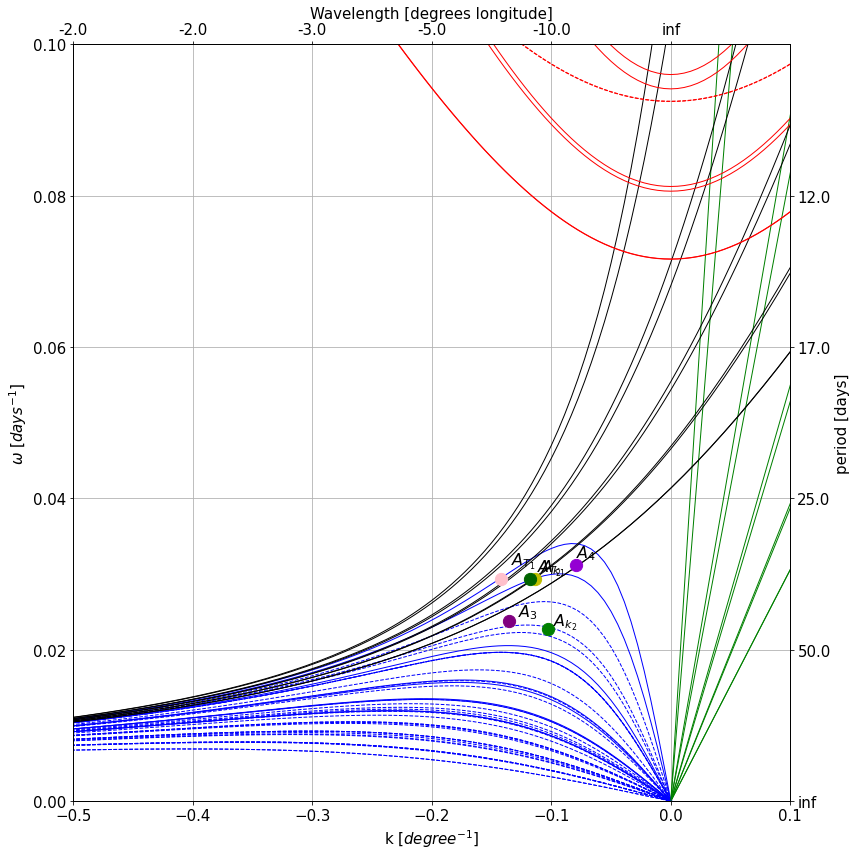

In [16]:
plot_dimensional_dispR(5,10)